In [131]:
import pandas as pd

In [132]:
data= pd.read_csv("/content/drive/MyDrive/Data Science /datasets/telecom_churn.csv")

print(data.shape)
data.head()

(3333, 11)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [133]:
# checking missing values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

*There are no missing values*

## Target Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


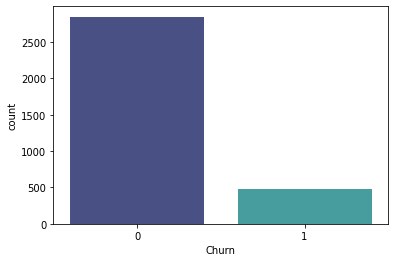

In [134]:
import seaborn as sns
sns.countplot(data["Churn"], palette= "mako")

In [135]:
print("percentage of 0 and 1 in target column :\n", data["Churn"].value_counts()/ len(data)*100)

percentage of 0 and 1 in target column :
 0    85.508551
1    14.491449
Name: Churn, dtype: float64


*The class distribution in the target variable is ~86:14 indicating an imbalanced dataset*

### Separating features and target

In [136]:
# features
x= data.iloc[:, 1:]

# target
y= data.iloc[:, 0]

## Handling Imbalanced Dataset

In [137]:
from imblearn.combine import SMOTETomek

smote= SMOTETomek()
x_sm, y_sm = smote.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Feature Scaling

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaled_features= scaler.fit_transform(x_sm)
scaled_features

array([[0.52479339, 1.        , 1.        , ..., 0.7667364 , 0.54260583,
        0.5       ],
       [0.43801653, 1.        , 1.        , ..., 0.69351464, 0.53765805,
        0.685     ],
       [0.56198347, 1.        , 0.        , ..., 0.37970711, 0.33315008,
        0.61      ],
       ...,
       [0.65117851, 0.        , 0.        , ..., 0.16637332, 0.74291179,
        0.62519584],
       [0.36382971, 1.        , 0.26847376, ..., 0.45265075, 0.80396412,
        0.32832528],
       [0.7311173 , 1.        , 0.        , ..., 0.51143346, 0.53080638,
        0.61028784]])

In [139]:
scaled_features= pd.DataFrame(scaled_features, columns= x.columns)
scaled_features.head(3)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.524793,1.0,1.0,0.500000,0.111111,0.753877,0.592593,0.766736,0.542606,0.500
1,0.438017,1.0,1.0,0.685185,0.111111,0.456634,0.688889,0.693515,0.537658,0.685
2,0.561983,1.0,0.0,0.000000,0.000000,0.691557,0.622222,0.379707,0.333150,0.610


In [140]:
# final feature
scaled_features

# final target
y_sm

array([0, 0, 0, ..., 1, 1, 1])

### Splitting into Train and Test data

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(scaled_features, y_sm, test_size=0.2, random_state=10)

### Implementing Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
y_predicted= model.predict_proba(x_test)
y_predicted

array([[0.33748878, 0.66251122],
       [0.21348692, 0.78651308],
       [0.13301933, 0.86698067],
       ...,
       [0.5541835 , 0.4458165 ],
       [0.15390532, 0.84609468],
       [0.0423636 , 0.9576364 ]])

In [151]:
# taking only probability of being "1"
y_predicted= y_predicted[:, 1]
y_predicted

array([0.66251122, 0.78651308, 0.86698067, ..., 0.4458165 , 0.84609468,
       0.9576364 ])

## ROC - AUC

In [152]:
# calculating False Positive Rate, True Positive Rate and Threshold values
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_predicted)

Text(0.5, 1.0, 'ROC - AUC')

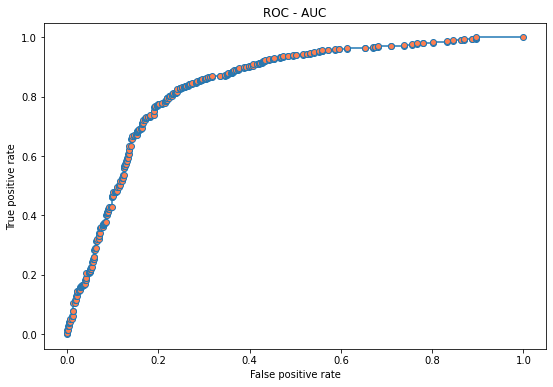

In [153]:
# plotting ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, marker= "o", markerfacecolor= "coral")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC - AUC")

In [154]:
# calculating Area Under Curve (AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)

0.838953680714591